In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
# filename = "../data/sorghum_ISU_595699_3_20241213-090157.npz"
# filename = "../data/sorghum_ISU_656102_1_20241211-124741.npz"
# filename = "../data/sorghum_ISU_598069_1_20241211-131032.npz"
# filename = "../data/sorghum_ISU_598069_2_20241211-141435.npz"
# filename = "../data/sorghum_ISU_656077_2_20241211-144228.npz"
# filename = "../data/sorghum_ISU_656034_1_test_long_pulse_20241209-194328.npz"
# filename = "../data/sorghum_ISU_656034_1_test_longer_pulse_20241209-195547.npz"
# filename = "../data/20241213/sorghum_ISU_533755_1_20241213-100544.npz"
# filename = "../data/cardboard_test/pulsetrain_data_20250327-103222.npz"
# filename = "../data/cardboard_test_2/pulsetrain_data_20250327-105023.npz"
filename = "../data/cardboard_test_3/pulsetrain_data_20250327-140200.npz"
data = np.load(filename)

In [3]:
vis_frames = data["ls_vis_frames"].astype(np.float32) / data["ls_vis_exposures"][:, None, None]
vis_tstamps = data["ls_vis_tstamps"]

thr_frames = data["raw_thr_frames"][:, 2:, ::-1]
thr_tstamps = data["raw_thr_tstamps"]

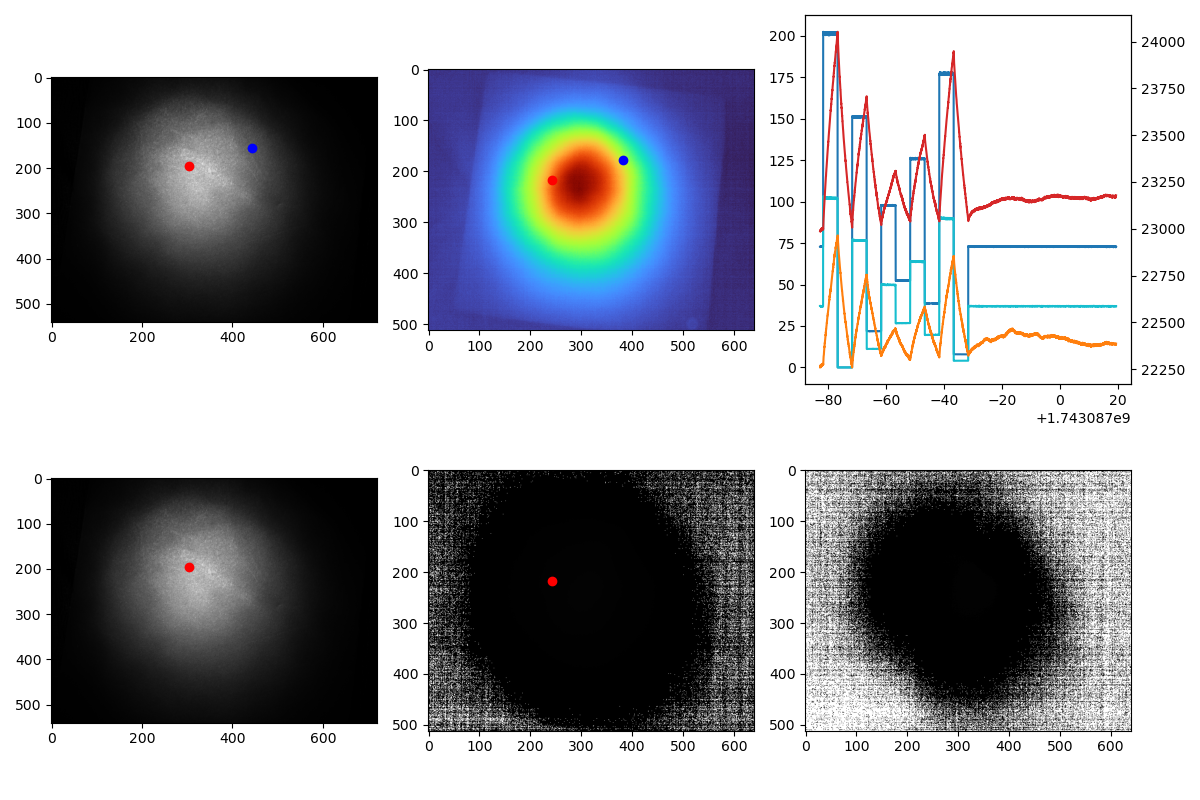

In [5]:
from skimage.exposure import equalize_adapthist, rescale_intensity

py1_v, px1_v = 195, 304
py1_t, px1_t = 217, 243

py2_v, px2_v = 155, 444
py2_t, px2_t = 177, 383

fig, ax = plt.subplots(2, 3, figsize=(12, 8))

ax[0, 0].imshow(vis_frames[0, :, :], cmap="gray")
ax[0, 0].scatter(px1_v, py1_v, c="r")
ax[0, 0].scatter(px2_v, py2_v, c="b")

ax[0, 1].imshow(rescale_intensity(thr_frames[0, :, :]), cmap="turbo")
ax[0, 1].scatter(px1_t, py1_t, c="r")
ax[0, 1].scatter(px2_t, py2_t, c="b")

ax[0, 2].plot(vis_tstamps, vis_frames[:, py1_v-5:py1_v+5, px1_v-5:px1_v+5].mean(axis=(1, 2)), label="VIS", color="tab:blue")
ax2 = ax[0, 2].twinx()
ax2.plot(thr_tstamps, thr_frames[:, py1_t-5:py1_t+5, px1_t-5:px1_t+5].mean(axis=(1, 2)), label="THR", color="tab:red")

ax[0, 2].plot(vis_tstamps, vis_frames[:, py2_v-5:py2_v+5, px2_v-5:px2_v+5].mean(axis=(1, 2)), label="VIS", color="tab:cyan")
ax2.plot(thr_tstamps, thr_frames[:, py2_t-5:py2_t+5, px2_t-5:px2_t+5].mean(axis=(1, 2)), label="THR", color="tab:orange")

ax[1, 0].imshow(vis_frames[-1, :, :], cmap="gray")
ax[1, 0].scatter(px1_v, py1_v, c="r")

ax[1, 1].imshow(rescale_intensity(thr_frames[900, :, :] - thr_frames[0, :, :]), cmap="gray")
ax[1, 1].scatter(px1_t, py1_t, c="r")

vis_diff_img = vis_frames[-1, :, :] - vis_frames[0, :, :]
# ax[1, 2].imshow(vis_diff_img, cmap="gray", vmin=np.percentile(vis_diff_img, 5), vmax=np.percentile(vis_diff_img, 95))

thr_diff_img = thr_frames[-1, :, :] - thr_frames[0, :, :]
thr_diff_img_normed = (thr_diff_img - thr_diff_img.min()) / (thr_diff_img.max() - thr_diff_img.min())
ax[1, 2].imshow(equalize_adapthist(thr_diff_img_normed), cmap="gray", vmin=0, vmax=1)

plt.tight_layout()
plt.show()